<a href="https://colab.research.google.com/github/mahima672000/Handwritten-Digits-Recognition-using-Simple-Neural-Network/blob/main/DeepLearningCourseProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Without Pixel Normalisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Importing dataset

trainX ,trainy = loadlocal_mnist(images_path ='/content/drive/MyDrive/MNSIT DATASET/train-images.idx3-ubyte',labels_path ='/content/drive/MyDrive/MNSIT DATASET/train-labels.idx1-ubyte')
testX ,testy =  loadlocal_mnist(images_path ='/content/drive/MyDrive/MNSIT DATASET/t10k-images.idx3-ubyte',labels_path='/content/drive/MyDrive/MNSIT DATASET/t10k-labels.idx1-ubyte')

In [5]:
def plot_input_img(i):
  plt.imshow(trainX[i].reshape(28,28),cmap='binary')
  plt.title(trainy[i].reshape(1,1))
  plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


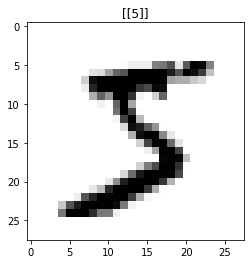

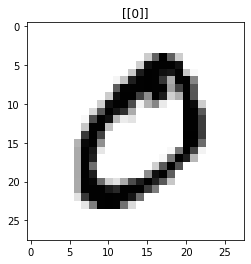

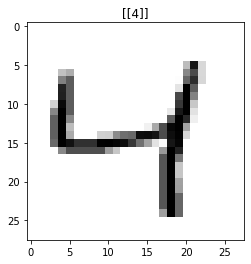

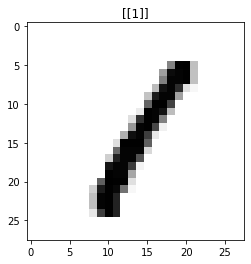

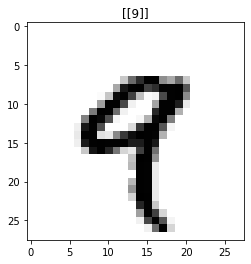

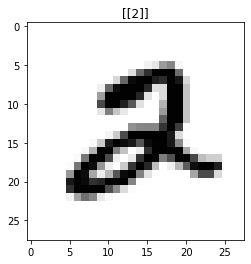

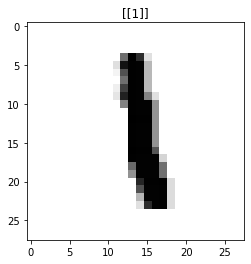

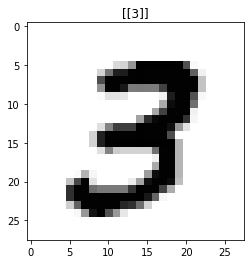

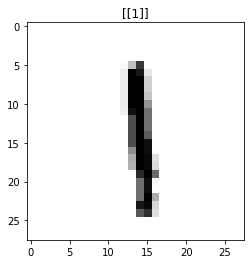

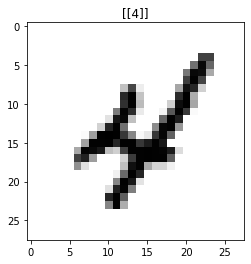

In [6]:
for i in range(10):
  plot_input_img(i)

In [7]:
def ReLU(x):
        return np.maximum(0,x)

In [8]:
def softmax(x):
        x = x - np.max(x, axis = 1).reshape(x.shape[0],1)
        return np.exp(x) / np.sum(np.exp(x), axis = 1).reshape(x.shape[0],1)

In [9]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
def softmax_derivative (x):
    return
def loss(predicted_output,desired_output):
    return 1/2*(desired_output-predicted_output)**2

class NeuralNetwork() :
    def __init__ (self, inputLayerNeuronsNumber , hiddenLayerNeuronsNumber, outputLayerNeuronsNumber):
        self.inputLayerNeuronsNumber = inputLayerNeuronsNumber
        self.hiddenLayerNeuronsNumber = hiddenLayerNeuronsNumber
        self.outputLayerNeuronsNumber = outputLayerNeuronsNumber
        self.learning_rate = 0.1
        #He initialization
        self.hidden_weights = np.random.randn(hiddenLayerNeuronsNumber,inputLayerNeuronsNumber)*np.sqrt(2/inputLayerNeuronsNumber)
        self.hidden_bias = np.zeros([hiddenLayerNeuronsNumber,1])
        self.output_weights = np.random.randn(outputLayerNeuronsNumber,hiddenLayerNeuronsNumber)
        self.output_bias = np.zeros([outputLayerNeuronsNumber,1])
        self.loss = []
        
        
    def train(self, inputs, desired_output):
        
        hidden_layer_in = np.dot(self.hidden_weights, inputs) + self.hidden_bias
        hidden_layer_out = ReLU(hidden_layer_in)
        
        output_layer_in = np.dot(self.output_weights, hidden_layer_out) + self.output_bias
        predicted_output = softmax(output_layer_in)
        
        error = desired_output - predicted_output
        d_predicted_output = error * softmax_derivative(predicted_output)
        
        error_hidden_layer = d_predicted_output.T.dot(self.output_weights)
        d_hidden_layer = error_hidden_layer.T * sigmoid_derivative(hidden_layer_out)
                
        self.output_weights += hidden_layer_out.dot(d_predicted_output.T).T * self.learning_rate
        self.output_bias = self.output_bias + np.sum(d_predicted_output, axis=0, keepdims=True) * self.learning_rate
        
        self.hidden_weights = self.hidden_weights +  inputs.dot(d_hidden_layer.T).T * self.learning_rate
        self.hidden_bias =  self.hidden_bias + np.sum(d_hidden_layer, axis=0, keepdims=True) * self.learning_rate
        self.loss.append(loss(predicted_output,desired_output))
        
        
    def predict(self, inputs):
        hidden_layer_in = np.dot(self.hidden_weights, inputs) + self.hidden_bias
        hidden_layer_out = sigmoid(hidden_layer_in)
        output_layer_in = np.dot(self.output_weights, hidden_layer_out) + self.output_bias
        predicted_output = sigmoid(output_layer_in)
        return predicted_output

In [10]:
nn=NeuralNetwork(784,128,10)

In [11]:
np.array(trainX[i,:])

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 189, 190,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 143, 247, 153,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [12]:
for i in range(trainX.shape[0]):
    inputs = np.array(trainX[i, :].reshape(-1,1))
    desired_output = np.array(trainy[i].reshape(-1,1))
    nn.train(inputs,desired_output)

TypeError: ignored

In [ ]:
y_pred = []
for i in range(testX.shape[0]): 
    inputs = np.array(testX[i].reshape(-1,1))
    y_pred.append(nn.predict(inputs))



In [ ]:
correct_counter = 0
for i in range(len(y_pred)):
    out_index = np.where(y_pred[i] == np.amax(y_pred[i]))[0][0]
  
    if testy[i][out_index] == 1:
      correct_counter+=1

In [ ]:
total_pred = testX.shape[0]
print(total_pred)

correct_pred = correct_counter
print(correct_pred)

In [ ]:
accuracy = (correct_pred / total_pred)*100
print(accuracy)

With Pixel Normalisation

In [ ]:
trainX = trainX.astype(np.float32)/255
trainY = trainY.astype(np.float32)/255